In [18]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plot

In [70]:
tolerancias = ['0.050000', '0.035000', '0.025000', '0.020000']
path_root = '../testing_results/test_movimiento_sin_tiempo_'
df_list = []

Levantamos los datos

In [72]:
path = "../testing_results/test_movimiento_sin_tiempo_0.020000.txt"
df_entero = pd.read_csv(path, sep=';')

for tolerancia in tolerancias :
    path = path_root + tolerancia + '.txt'
    df_list.append(pd.read_csv(path, sep=';'))
print(df_list[3])

          base  shoulder     elbow     pitch      roll  is_end_pose  move_id
0     0.006965  1.483416 -0.000132  0.020983 -0.003105            0        0
1     0.006965  1.483386 -0.000132  0.020709 -0.003105            0        0
2    -0.039440  1.437223  0.030671 -0.010179  0.043148            0        0
3    -0.034347  1.439375  0.030501  0.008382  0.041830            0        0
4    -0.085845  1.391029  0.061474 -0.041341  0.089401            0        0
...        ...       ...       ...       ...       ...          ...      ...
2453  0.053710  1.456379 -0.036055  0.044195 -0.055440            0        0
2454  0.059339  1.459123 -0.036127  0.063223 -0.056373            0        0
2455 -0.000161  1.483462  0.000054  0.008603 -0.001299            1        0
2456  0.007306  1.485720 -0.000132  0.027831 -0.002124            1        0
2457  0.000000  0.000000  0.000000  0.000000  0.000000            2        3

[2458 rows x 7 columns]


Agregamos cual a que movimiento corresponde cada posición

In [73]:
def discriminar_movimientos_goals_reales_y_esperados(df) :

    arr_de_ceros = [0]*len(df)
    arr_de_ceros_2 = [0]*len(df)
    df_discriminando_movimientos = df.assign(num_goal=arr_de_ceros)
    df_discriminando_movimientos = df_discriminando_movimientos.assign(es_el_esperado=arr_de_ceros_2)


    num_movimiento = 1
    num_de_goal = 1
    es_real = False

    for i, row in df_discriminando_movimientos.iterrows():
        df_discriminando_movimientos.at[i, 'num_goal'] = num_de_goal
        
        ## primero vemos si es un marcador de movimiento (is_end_pose = 2)
        if(row['is_end_pose'] == 2) :
            num_movimiento = (row['move_id'] % 3) + 1
            df_discriminando_movimientos.at[i,'num_goal'] = 0
        else:
            ## si no es marcador, es un dato y ahí vemos si es real o deseado
            df_discriminando_movimientos.at[i, 'move_id'] = num_movimiento
            if(not es_real) :
                df_discriminando_movimientos.at[i, 'es_el_esperado'] = 1
                es_real = True
            else :
                es_real = False
                num_de_goal = num_de_goal + 1
                if (row['is_end_pose'] == 1) :
                    num_de_goal = 1

    df_discriminando_movimientos = df_discriminando_movimientos.query('is_end_pose != 2')

    return df_discriminando_movimientos


In [75]:
df_entero_discriminando_movimientos = discriminar_movimientos_goals_reales_y_esperados(df_entero)

df_list_movs = []

for df in df_list :
    df_list_movs.append(discriminar_movimientos_goals_reales_y_esperados(df))

In [57]:
df_primer_mov = df_entero_discriminando_movimientos.query('move_id == 1')
df_segundo_mov = df_entero_discriminando_movimientos.query('move_id == 2')
df_tercer_mov = df_entero_discriminando_movimientos.query('move_id == 3')

df_primer_mov_real = df_primer_mov.query('es_el_esperado == 0')
df_primer_mov_esperado = df_primer_mov.query('es_el_esperado == 1')

df_segundo_mov_real = df_segundo_mov.query('es_el_esperado == 0')
df_segundo_mov_esperado = df_segundo_mov.query('es_el_esperado == 1')

df_tercer_mov_real = df_tercer_mov.query('es_el_esperado == 0')
df_tercer_mov_esperado = df_tercer_mov.query('es_el_esperado == 1')

In [58]:
print(df_primer_mov_real.get('num_goal').value_counts())
print(df_segundo_mov_real.get('num_goal').value_counts())
print(df_tercer_mov_real.get('num_goal').value_counts())

1     10
27    10
21    10
22    10
23    10
24    10
25    10
26    10
28    10
19    10
29    10
30    10
31    10
32    10
33    10
34    10
20    10
18    10
2     10
9     10
3     10
4     10
5     10
6     10
7     10
8     10
10    10
17    10
11    10
12    10
13    10
14    10
15    10
16    10
35     8
Name: num_goal, dtype: int64
1     10
2     10
31    10
32    10
33    10
34    10
35    10
36    10
37    10
38    10
39    10
40    10
41    10
42    10
43    10
44    10
45    10
46    10
47    10
48    10
49    10
50    10
51    10
52    10
53    10
54    10
55    10
30    10
29    10
28    10
14    10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11    10
12    10
13    10
15    10
27    10
16    10
17    10
18    10
19    10
20    10
21    10
22    10
23    10
24    10
25    10
26    10
56    10
Name: num_goal, dtype: int64
1     10
17    10
30    10
29    10
28    10
27    10
26    10
25    10
24    10
23    10
22    10
21    10
20    10
19    

In [59]:
df_primer_mov_real = df_primer_mov_real.query('is_end_pose == 1')
print(df_primer_mov_real)
df_segundo_mov_real = df_segundo_mov_real.query('is_end_pose == 1')
df_tercer_mov_real = df_tercer_mov_real.query('is_end_pose == 1')

          base  shoulder     elbow     pitch      roll  is_end_pose  move_id  \
69   -1.564455 -0.092048  1.044999 -1.021978  1.567160            1        1   
316  -1.565445 -0.092754  1.044934 -1.022526  1.566996            1        1   
561  -1.568108 -0.092631  1.045065 -1.019239  1.567323            1        1   
808  -1.567971 -0.092662  1.044934 -1.019677  1.567160            1        1   
1053 -1.565138 -0.092570  1.044901 -1.019677  1.567160            1        1   
1300 -1.567220 -0.092508  1.044901 -1.019896  1.567323            1        1   
1547 -1.566810 -0.092355  1.044736 -1.022416  1.566996            1        1   
1792 -1.565718 -0.093215  1.044999 -1.019567  1.566996            1        1   
2039 -1.565991 -0.092170  1.044901 -1.022690  1.567323            1        1   
2282 -1.568142 -0.092293  1.044802 -1.021321  1.567160            1        1   

      num_goal  es_el_esperado  
69          35               0  
316         35               0  
561         35      

In [60]:
df_primer_mov_esperado = df_primer_mov_esperado.query('is_end_pose == 1')
print(df_primer_mov_esperado)
df_segundo_mov_esperado = df_segundo_mov_esperado.query('is_end_pose == 1')
df_tercer_mov_esperado = df_tercer_mov_esperado.query('is_end_pose == 1')

          base  shoulder     elbow     pitch      roll  is_end_pose  move_id  \
68   -1.570809 -0.087169  1.047163 -1.038525  1.569490            1        1   
315  -1.570857 -0.087256  1.047149 -1.038529  1.569406            1        1   
560  -1.570765 -0.087278  1.047313 -1.038528  1.569491            1        1   
807  -1.570862 -0.087234  1.047148 -1.038589  1.569433            1        1   
1052 -1.570797 -0.087194  1.047173 -1.038536  1.569390            1        1   
1299 -1.570935 -0.087165  1.047199 -1.038513  1.569505            1        1   
1546 -1.570824 -0.087191  1.047167 -1.038542  1.569446            1        1   
1791 -1.570842 -0.087302  1.047131 -1.038593  1.569448            1        1   
2038 -1.570780 -0.087267  1.047165 -1.038497  1.569477            1        1   
2281 -1.570809 -0.087169  1.047143 -1.038524  1.569541            1        1   

      num_goal  es_el_esperado  
68          35               1  
315         35               1  
560         35      

In [61]:
df_primer_mov_real_juntas = df_primer_mov_real.drop(['is_end_pose','move_id','num_goal','es_el_esperado'],axis='columns')
print(df_primer_mov_real_juntas)
df_segundo_mov_real_juntas = df_segundo_mov_real.drop(['is_end_pose','move_id','num_goal','es_el_esperado'],axis='columns')
df_tercer_mov_real_juntas = df_tercer_mov_real.drop(['is_end_pose','move_id','num_goal','es_el_esperado'],axis='columns')

df_primer_mov_esperado_juntas = df_primer_mov_esperado.drop(['is_end_pose','move_id','num_goal','es_el_esperado'],axis='columns')
print(df_primer_mov_esperado_juntas)
df_segundo_mov_esperado_juntas = df_segundo_mov_esperado.drop(['is_end_pose','move_id','num_goal','es_el_esperado'],axis='columns')
df_tercer_mov_esperado_juntas = df_tercer_mov_esperado.drop(['is_end_pose','move_id','num_goal','es_el_esperado'],axis='columns')


          base  shoulder     elbow     pitch      roll
69   -1.564455 -0.092048  1.044999 -1.021978  1.567160
316  -1.565445 -0.092754  1.044934 -1.022526  1.566996
561  -1.568108 -0.092631  1.045065 -1.019239  1.567323
808  -1.567971 -0.092662  1.044934 -1.019677  1.567160
1053 -1.565138 -0.092570  1.044901 -1.019677  1.567160
1300 -1.567220 -0.092508  1.044901 -1.019896  1.567323
1547 -1.566810 -0.092355  1.044736 -1.022416  1.566996
1792 -1.565718 -0.093215  1.044999 -1.019567  1.566996
2039 -1.565991 -0.092170  1.044901 -1.022690  1.567323
2282 -1.568142 -0.092293  1.044802 -1.021321  1.567160
          base  shoulder     elbow     pitch      roll
68   -1.570809 -0.087169  1.047163 -1.038525  1.569490
315  -1.570857 -0.087256  1.047149 -1.038529  1.569406
560  -1.570765 -0.087278  1.047313 -1.038528  1.569491
807  -1.570862 -0.087234  1.047148 -1.038589  1.569433
1052 -1.570797 -0.087194  1.047173 -1.038536  1.569390
1299 -1.570935 -0.087165  1.047199 -1.038513  1.569505
1546 -1.57

In [62]:
df_error_primer_mov = df_primer_mov_esperado_juntas.reset_index(drop=True) - df_primer_mov_real_juntas.reset_index(drop=True)
print(df_error_primer_mov)
df_error_segundo_mov = df_segundo_mov_esperado_juntas.reset_index(drop=True) - df_segundo_mov_real_juntas.reset_index(drop=True)
df_error_tercer_mov = df_primer_mov_esperado_juntas.reset_index(drop=True) - df_primer_mov_real_juntas.reset_index(drop=True)

       base  shoulder     elbow     pitch      roll
0 -0.006354  0.004879  0.002164 -0.016547  0.002330
1 -0.005412  0.005498  0.002215 -0.016003  0.002410
2 -0.002657  0.005353  0.002248 -0.019289  0.002168
3 -0.002891  0.005428  0.002214 -0.018912  0.002273
4 -0.005659  0.005376  0.002272 -0.018859  0.002230
5 -0.003715  0.005343  0.002298 -0.018617  0.002182
6 -0.004014  0.005164  0.002431 -0.016126  0.002450
7 -0.005124  0.005913  0.002132 -0.019026  0.002452
8 -0.004789  0.004903  0.002264 -0.015807  0.002154
9 -0.002667  0.005124  0.002341 -0.017203  0.002381


In [63]:
df_error_primer_mov_avg = df_error_primer_mov.abs().mean()
df_error_primer_mov_var = df_error_primer_mov.abs().var()

df_error_segundo_mov_avg = df_error_segundo_mov.abs().mean()
df_error_segundo_mov_var = df_error_segundo_mov.abs().var()

df_error_tercer_mov_avg = df_error_tercer_mov.abs().mean()
df_error_tercer_mov_var = df_error_tercer_mov.abs().var()


                 1         2         3
base      0.004328  0.006654  0.004328
shoulder  0.005298  0.005380  0.005298
elbow     0.002258  0.000194  0.002258
pitch     0.017639  0.018848  0.017639
roll      0.002303  0.000717  0.002303


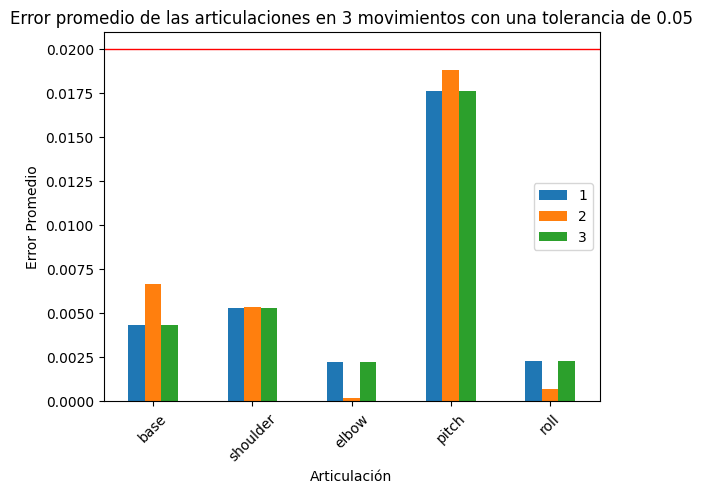

In [65]:
df_errores_avg = pd.concat([df_error_primer_mov_avg.rename('1'), df_error_segundo_mov_avg.rename('2'), df_error_tercer_mov_avg.rename('3')], axis=1)
print(df_errores_avg)

df_errores_avg.plot(kind='bar')
plot.title("Error promedio de las articulaciones en 3 movimientos con una tolerancia de 0.05")
plot.ylabel("Error Promedio")
plot.xlabel("Articulación")
plot.xticks(rotation=45, horizontalalignment="center")
plot.axhline(y=0.020, linewidth=1, color='red')
